In [19]:
from core.read_events import *
from core.utils import *
from Gaugi import stdvector2list, progressbar, GeV
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure
from ROOT import kBird,kBlackBody,gStyle
from pprint import pprint

import os
import json
import pandas as pd
import array
import numpy as np
import pickle
import rootplotlib as rpl
rpl.set_lorenzetti_style()
rpl.suppress_root_warnings()
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
from atlasify import atlasify


import atlas_mpl_style as ampl
ampl.use_atlas_style()
plt.rcParams['text.usetex'] = True


%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

os.makedirs('output', exist_ok=True)


Applying ATLAS style settings...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
basepath = '/home/jodafons/git_repos/lorenzetti/build/lorenzetti/geometry/DetectorATLASModel/data'
pulse_lar_path = basepath+'/pulseLar.dat'
pulse_tile_path = basepath+'/pulseTile.dat'

In [29]:
def read_pulse(path):
    f = open(path,'r')
    t=[]
    amp=[]
    for line in f.readlines():
        line = line.split()
        t.append(float(line[0]))
        amp.append(float(line[1]))
    f.close()
    return np.array(t), np.array(amp)


lar_t, lar_amp = read_pulse(pulse_lar_path)
tile_t, tile_amp = read_pulse(pulse_tile_path)

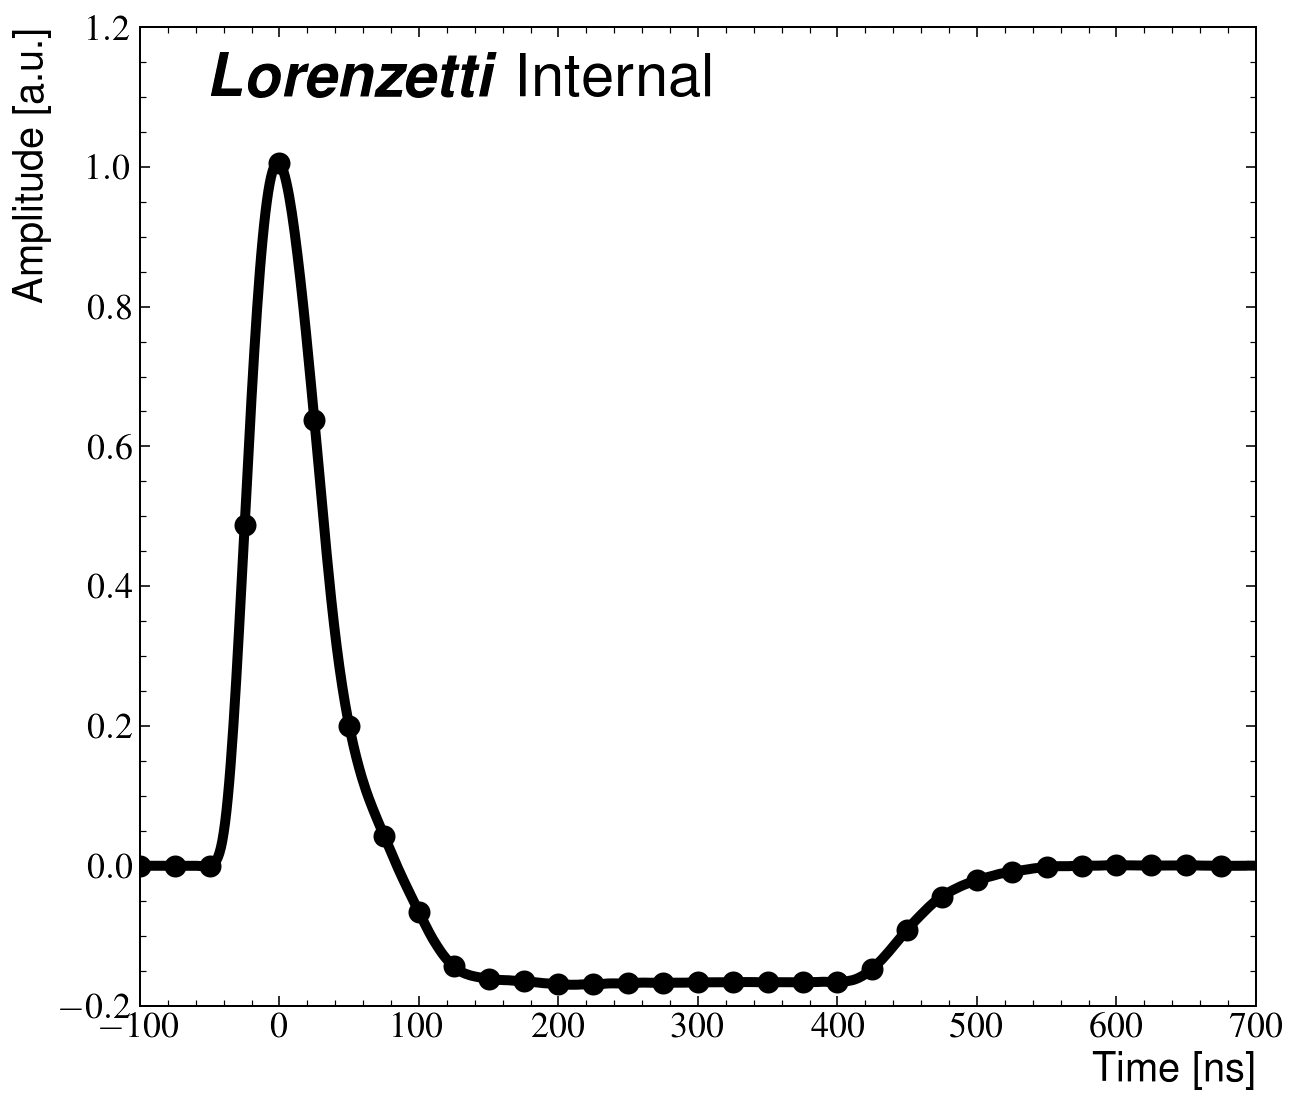

In [75]:
fig, ax = plt.subplots(figsize=(10,9))
samp = np.where( (lar_t%25)==0 )
plt.plot(lar_t,lar_amp, color='k', linewidth=5)
plt.plot( lar_t[samp], lar_amp[samp], marker='.', markersize=20, ls="", color='k')
plt.xlabel('Time [ns]', loc='right')
plt.ylabel('Amplitude [a.u.]', loc='top')


plt.ylim((-0.2,1.2))
plt.xlim((-100,700))
_label='Lorenzetti'
sim_str='Internal'
status_str=''

label = fr"\textbf{{\textit{{{_label}}}}} {sim_str}{status_str}"
ax.text(-50, 1.1, label, fontsize=30)
#plt.show()
plt.savefig('lar_pulse.pdf')

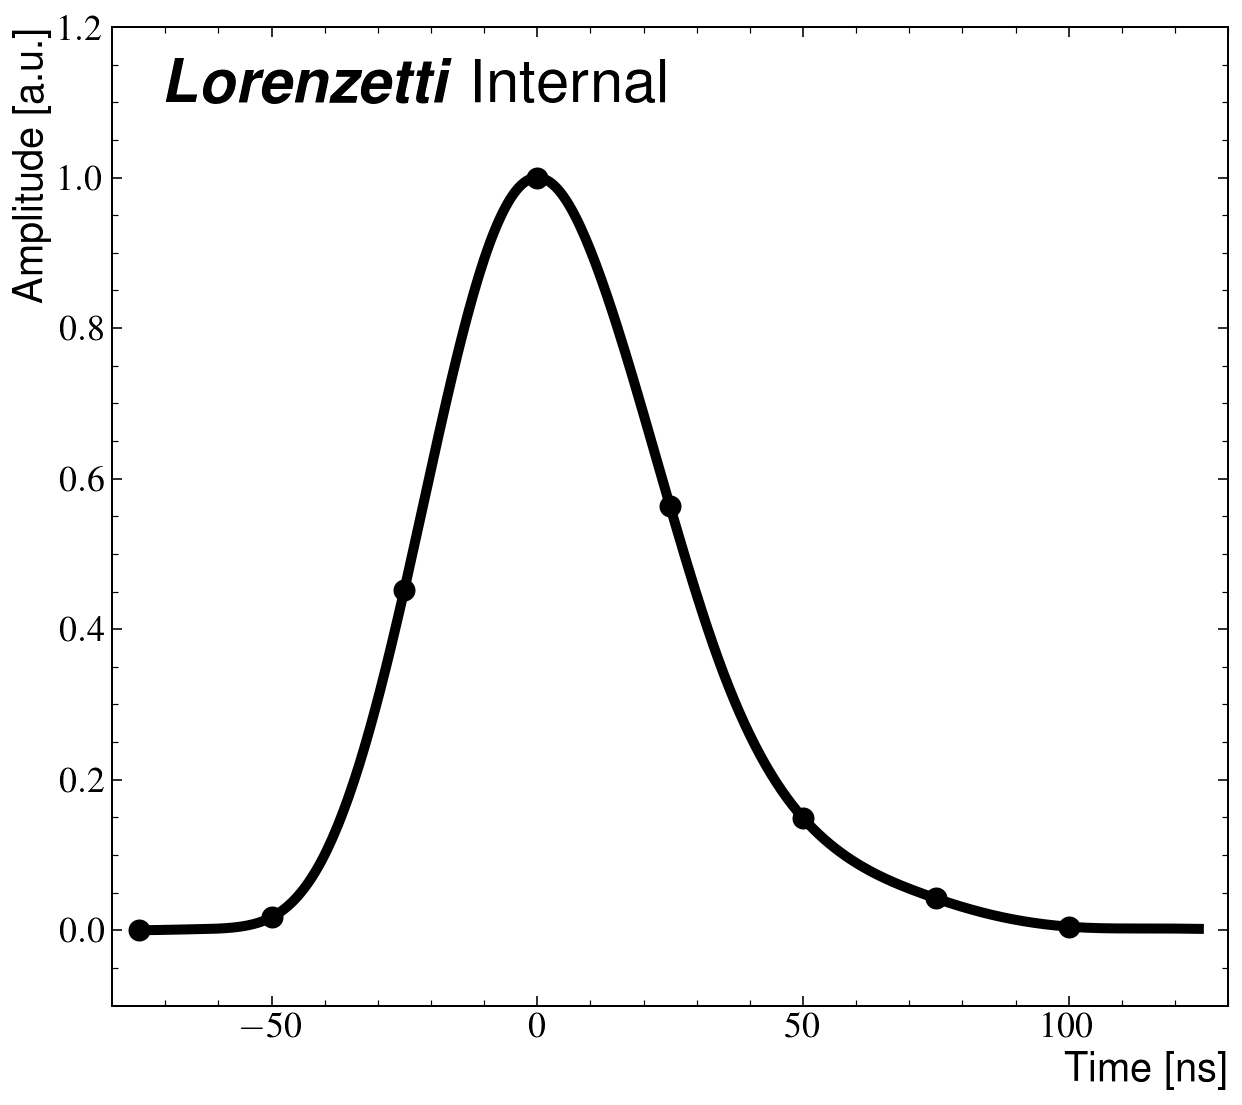

In [76]:
fig, ax = plt.subplots(figsize=(10,9))
samp = np.where( (tile_t%25)==0 )
plt.plot(tile_t,tile_amp, color='k', linewidth=5)
plt.plot( tile_t[samp], tile_amp[samp], marker='.', markersize=20, ls="", color='k')
plt.xlabel('Time [ns]', loc='right')
plt.ylabel('Amplitude [a.u.]', loc='top')


plt.ylim((-0.1,1.2))
plt.xlim((-80,130))
_label='Lorenzetti'
sim_str='Internal'
status_str=''
label = fr"\textbf{{\textit{{{_label}}}}} {sim_str}{status_str}"
ax.text(-70, 1.1, label, fontsize=30)
#plt.show()
plt.savefig('tile_pulse.pdf')

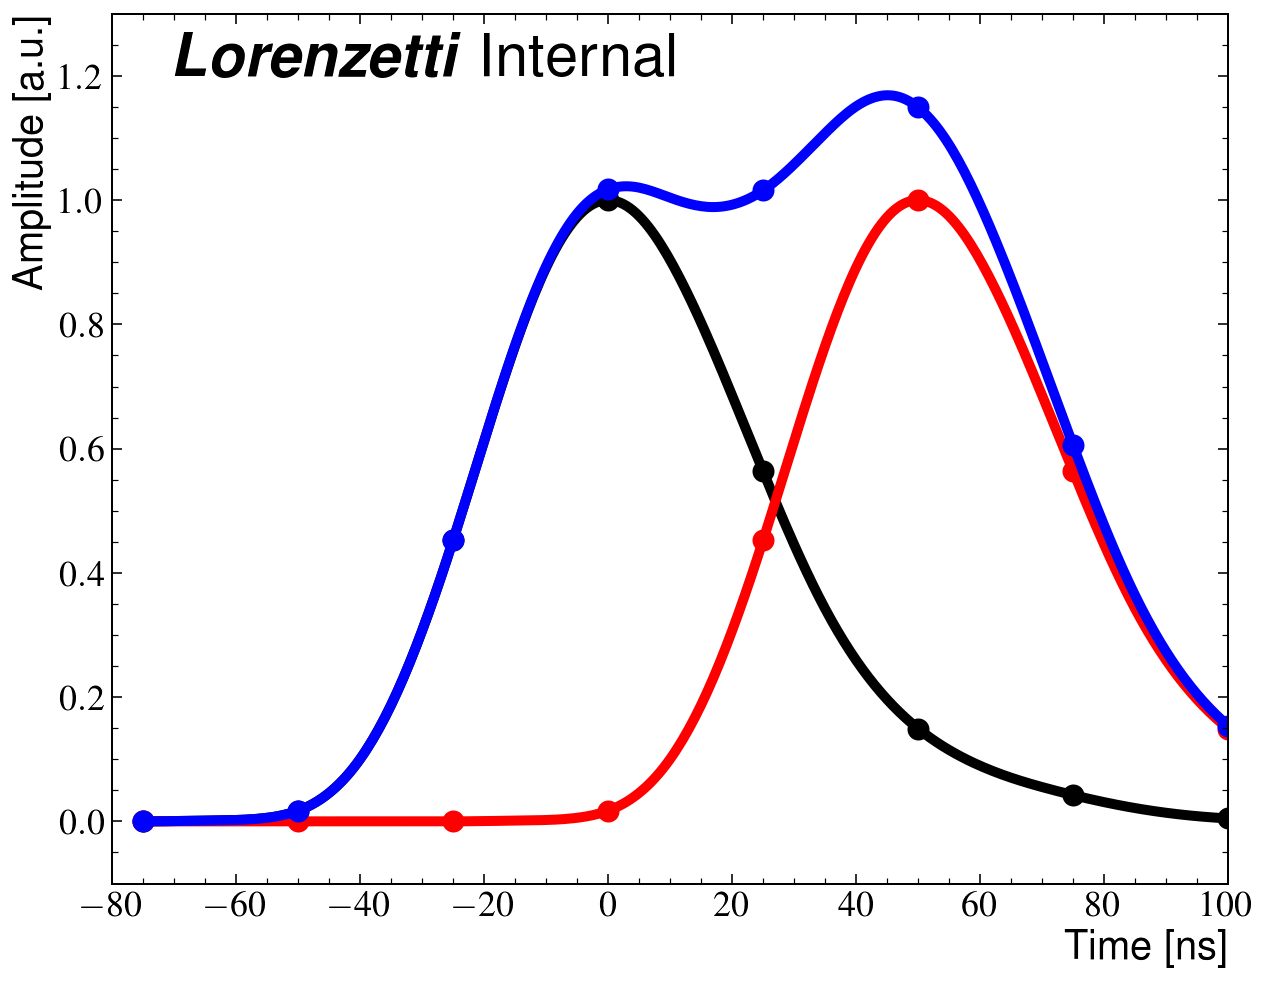

In [77]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(tile_t,tile_amp, color='k', linewidth=5)
samp = np.where( (tile_t%25)==0 )
plt.plot( tile_t[samp], tile_amp[samp], marker='.', markersize=20, ls="", color='k')
tile_amp_bc2 = shift(tile_amp, 100, cval=0)
plt.plot(tile_t,tile_amp_bc2, color='r', linewidth=5)
plt.plot( tile_t[samp], tile_amp_bc2[samp], marker='.', markersize=20, ls="", color='r')
tile_amp_end = tile_amp + tile_amp_bc2
plt.plot(tile_t,tile_amp_end, color='b', linewidth=5)
plt.plot( tile_t[samp], tile_amp_end[samp], marker='.', markersize=20, ls="", color='b')
plt.xlabel('Time [ns]', loc='right')
plt.ylabel('Amplitude [a.u.]', loc='top')
plt.ylim((-0.1,1.3))
plt.xlim((-80,100))
_label='Lorenzetti'
sim_str='Internal'
status_str=''
label = fr"\textbf{{\textit{{{_label}}}}} {sim_str}{status_str}"
ax.text(-70, 1.2, label, fontsize=30)
#plt.show()
plt.savefig('tile_pulse_pileup.pdf')